Analyzing Tweets
@Authors: Sridhar Nerur, Samuel Jayaraj, and Mahyar Vagehfi

Social media sites such as Twitter, Facebook, and Instagram - to name but a few - have been an endless source of data for machine learning and AI enthusiasts. In this notebook, we will get into the rudiments of analyzing tweets. 

There are quite a few python modules that provide access to the Twitter API. Some of them are listed at https://developer.twitter.com/en/docs/developer-utilities/twitter-libraries. We will be using Tweepy in this tutorial. Much of what you see here was libreally borrowed from https://realpython.com/twitter-bot-python-tweepy/. You may use pip to install tweepy.

You will have to set up a Twitter account first, if you don't already have one. The next step is to get a developer twitter account from https://developer.twitter.com/en. You will then do the following:

1. Create an App
2. Create authentication credentials - go to the "Keys and tokens tab" and generate what you need. You will need the "Consumer API keys" and the Access Token and access token secret.

Note that I had to pip install several Python packages that would normally be available in Anaconda. The reason is that I used a virtual environment for this notebook. You may disregard these cells if you already have these packages installed.

Now that you have your consumer key, consumer secret, access token, and access token secret, you can start using tweepy ......

In [1]:
import tweepy

In [2]:
# Authentication details are required to access the Twitter API
#Replace Consumer_key, Consumer_secret, access_token, and access_secret
#with your credentials/app key details from Twitter

auth = tweepy.OAuthHandler("CONSUMER_KEY", "CONSUMER_SECRET")
auth.set_access_token("ACCESS_TOKEN", "ACCESS_TOKEN_SECRET")

# Create API object
api = tweepy.API(auth)


Now that we access to the API, we can try out things...For example, you can update your status as follows:

api.update_status("All well here....")

It may be a good idea to set an alert when we exceed Twitter's allowed rate. Here is how you do it.


In [3]:
# Create a different API object
api = tweepy.API(auth, wait_on_rate_limit=True,
    wait_on_rate_limit_notify=True)

In [4]:
#10 recent English tweets that contain the word Python
#Let us store the tweets in a list and see what they look like
python_tweets = []
for tweet in api.search(q="Python", lang="en", rpp=10):
    #print(f"{tweet.user.name}:{tweet.text}")
    python_tweets.append(tweet)
    

In [5]:
#Let us look at the first one
python_tweets[0]

Status(_api=<tweepy.api.API object at 0x11086a670>, _json={'created_at': 'Sun May 24 20:15:58 +0000 2020', 'id': 1264651373469143041, 'id_str': '1264651373469143041', 'text': 'Thank you so much for the kind words, @_teoguso ! Glad you like them! \n\nAnd for anyone interested, my Exploring Pyt… https://t.co/9vJIZmozCC', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': '_teoguso', 'name': 'Matteo Guzzo', 'id': 798840768802607108, 'id_str': '798840768802607108', 'indices': [38, 47]}], 'urls': [{'url': 'https://t.co/9vJIZmozCC', 'expanded_url': 'https://twitter.com/i/web/status/1264651373469143041', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_i

In [6]:
#What on earth is this? What type of data is a tweet?
type(python_tweets[0])

tweepy.models.Status

In [7]:
#we can get to the text as follows
python_tweets[0].text

'Thank you so much for the kind words, @_teoguso ! Glad you like them! \n\nAnd for anyone interested, my Exploring Pyt… https://t.co/9vJIZmozCC'

In [8]:
#we can get to the user's name using the following
python_tweets[0].user.name

'Naomi Ceder'

In [9]:
#What is under entities?
python_tweets[0].entities

{'hashtags': [],
 'symbols': [],
 'user_mentions': [{'screen_name': '_teoguso',
   'name': 'Matteo Guzzo',
   'id': 798840768802607108,
   'id_str': '798840768802607108',
   'indices': [38, 47]}],
 'urls': [{'url': 'https://t.co/9vJIZmozCC',
   'expanded_url': 'https://twitter.com/i/web/status/1264651373469143041',
   'display_url': 'twitter.com/i/web/status/1…',
   'indices': [117, 140]}]}

As you can see, hashtags is under entities. You can get to it by running the following command:

python_tweets[0].entities['hashtags']

In [10]:
python_tweets[0].entities['hashtags']

[]

In [11]:
python_tweets[0].user.followers_count

6017

In [12]:
#You can find what is trending in different places. Let us see
#what is trending in Dallas. First, we need to find the place code for
#Dallas
for d in api.trends_available():
    if d['name'] == 'Dallas-Ft. Worth':
        print(d)
        break

{'name': 'Dallas-Ft. Worth', 'placeType': {'code': 7, 'name': 'Town'}, 'url': 'http://where.yahooapis.com/v1/place/2388929', 'parentid': 23424977, 'country': 'United States', 'woeid': 2388929, 'countryCode': 'US'}


In [13]:
trends_result = api.trends_place(2388929)
for trend in trends_result[0]["trends"]:
    print(trend["name"])


Doja
Biden
Jesus
Memorial Day
Praying
Democrats
#TheMatch
#ULTRAPrizeScramble
#LGBTQneveralone
Ann Coulter
#cashapptwitch
Chris Wallace
#PanVisibilityDay
Uncharted 2
Ozarks
shinee
Nikki Haley
Ocean City
Bob Dylan
Ayesha
"Ambassador"
Medalist
Marty Byrde
Naeto
Denzel Burke
Yo-Yo Ma
#CocaCola600
#SundayFunday
#championsforcharity
#BeyonceXTRAParty
#Indy500
#ImWithHer
#Uyajola99
#ItCanBeAProblemWhen
#relationshipgoalsRELOADED
#NationalBrothersDay
#NKOTBLive
#100KCams
#WelcomeSanditon
#justiceforjacob


In [14]:
tweets_list = []

In [15]:
#Let us get 2000 tweets related to COVID-19 and see what we can do with
#them
search_words = "#Covid19 -filter:retweets" #no retweets
date_since = "2020-01-01"
tweets = tweepy.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(2000)

for tweet in tweets:
    tweets_list.append(tweet)

In [16]:
len(tweets_list)


2000

In [17]:
#Function that will get us the text, location, and coordinates of
#a tweet -- returns a dictionary. Note that location and coordinates
#are not always available
def process_tweet(tweet):
    import numpy as np
    text = tweet.text
    if tweet.user.location:
        location = tweet.user.location
    else:
        location = np.nan
    if tweet.coordinates:
        coordinates = tweet.coordinates
    else:
        coordinates = np.nan
    return dict(text = text, location = location, coordinates = coordinates)

In [18]:
results = []
for tweet in tweets_list:
    results.append(process_tweet(tweet))

In [24]:
!pip install pandas

     |████████████████████████████████| 10.2 MB 34.7 MB/s eta 0:00:01


In [19]:
import pandas as pd
df = pd.DataFrame(results)
df.head()

,text,location,coordinates
0,@JamesEFoster @skwawkbox @BorisJohnson #borisj...,NaN,NaN
1,Topless bars can be open\n but NOT churches ?\...,#worldwide,NaN
2,Everyone ready for school a week on Monday? #d...,NaN,NaN
3,@lisaJtoronto @cityoftoronto @TorontoPolice 👉👉...,"Toronto, Ontario, Canada",NaN
4,"If you wear your mask like this, trust me, you...","Halifax, Nova Scotia",NaN


In [20]:
df.shape

(2000, 3)

In [21]:
df.isna().sum() #check for missing values

text              0
location        410
coordinates    1988
dtype: int64

We can see that 410 location values are missing, and it appears that only 12 coordinates are available to us. Let us drop the coordinates column and use the locations to extract city and, if possible, country information. We will use a Python package called geonamescache for this.

In [22]:
import geonamescache

gc = geonamescache.GeonamesCache()
countries = gc.get_countries()
cities = gc.get_cities()

Some of the cities and countries may have accents and characters that we may not use regularly. For example, Sao Paulo in Brazil  is supposed to look like this: São Paulo. Let us remove these special characters using a Python package called unidecode.

In [34]:
!pip install unidecode

  Using cached Unidecode-1.1.1-py2.py3-none-any.whl (238 kB)


In [23]:
from unidecode import unidecode
unidecode('São Paulo')

'Sao Paulo'

In [24]:
countries_list = []
for country_value in list(countries.values()):
    countries_list.append(country_value['name'])
countries = [unidecode(country) for country in countries]
countries_list[:10]

['Andorra',
 'United Arab Emirates',
 'Afghanistan',
 'Antigua and Barbuda',
 'Anguilla',
 'Albania',
 'Armenia',
 'Angola',
 'Antarctica',
 'Argentina']

In [25]:
cities_list = []
for city_value in list(cities.values()):
    cities_list.append(city_value['name'])
#cities_list.append('Sao Paulo')
cities = [unidecode(city) for city in cities]
cities_list[:10]

['Andorra la Vella',
 'Umm Al Quwain City',
 'Ras Al Khaimah City',
 'Zayed City',
 'Khawr Fakkān',
 'Dubai',
 'Dibba Al-Fujairah',
 'Dibba Al-Hisn',
 'Sharjah',
 'Ar Ruways']

We will use regex to find cities and countries in our text. The following example shows how it works.

In [26]:
import re
separator = r'\b|\b'
sample_cities = ['San Francisco','Sao Paulo','San']
pattern = separator.join(sample_cities)
pattern
s = "The city of San near Sao Paulo but far from San Francisco is cool"
match = re.findall(pattern, s)
match

['San', 'Sao Paulo', 'San Francisco']

Notice that we were able to extract all 3 cities from the simple text. But, it is important to have a list of cities in descending order by length.

In [27]:
sorted_cities = sorted(cities_list, key = lambda x: len(x), reverse = True)
sorted_cities[:5]

['Chak Two Hundred Forty-nine Thal Development Authority',
 'Dolores Hidalgo Cuna de la Independencia Nacional',
 'Ampliación San Mateo (Colonia Solidaridad)',
 'Licenciado Benito Juárez (Campo Gobierno)',
 'Sant Pere, Santa Caterina i La Ribera']

In [28]:
sorted_countries = sorted(countries_list, key = lambda x: len(x), reverse = True)
sorted_countries[:5]

['South Georgia and the South Sandwich Islands',
 'United States Minor Outlying Islands',
 'Bonaire, Saint Eustatius and Saba ',
 'Heard Island and McDonald Islands',
 'Democratic Republic of the Congo']

In [29]:
city_pattern = separator.join(sorted_cities)
country_pattern = separator.join(sorted_countries)

In [30]:
import numpy as np
def process_location(location, city_pattern, country_pattern):
    match = re.search(city_pattern, location)
    if match:
        city = match.group(0)
    else:
        city = np.nan
    match = re.search(country_pattern, location)
    if match:
        country = match.group(0)
    else:
        country = np.nan
    return dict(location=location, city = city, country = country)  

In [31]:
#Let us delete locations that have missing values
df.dropna(subset = ['location'], inplace = True)
df.shape

(1590, 3)

In [32]:
processed_data = [process_location(line, city_pattern, country_pattern) \
                 for line in list(df['location'])]

In [35]:
#len(processed_data) --> 1590 
processed_data[:2]

[{'location': '#worldwide ', 'city': nan, 'country': nan},
 {'location': 'Toronto, Ontario, Canada',
  'city': 'Toronto',
  'country': 'Canada'}]

In [36]:
#import pandas as pd
new_df = pd.DataFrame(processed_data)
new_df.head()

,location,city,country
0,#worldwide,NaN,NaN
1,"Toronto, Ontario, Canada",Toronto,Canada
2,"Halifax, Nova Scotia",Halifax,NaN
3,Yorkshire and The Humber,NaN,NaN
4,"Lahore, Pakistan",Lahore,Pakistan


In [37]:
#Let us add the text from df to this dataframe
new_df['text'] = list(df['text'])
new_df.shape

(1590, 4)

In [38]:
new_df.head()

,location,city,country,text
0,#worldwide,NaN,NaN,Topless bars can be open\n but NOT churches ?\...
1,"Toronto, Ontario, Canada",Toronto,Canada,@lisaJtoronto @cityoftoronto @TorontoPolice 👉👉...
2,"Halifax, Nova Scotia",Halifax,NaN,"If you wear your mask like this, trust me, you..."
3,Yorkshire and The Humber,NaN,NaN,The Tory w@anker Boris and the rest of his cre...
4,"Lahore, Pakistan",Lahore,Pakistan,Article : Social Stigma and Racial Discriminat...


In [39]:
#How many missing values per column
new_df.isna().sum()

location       0
city         653
country     1237
text           0
dtype: int64

In [40]:
#Let us drop country and then eliminate missing values from city
new_df.drop('country', axis = 1, inplace = True)
new_df.dropna(subset = ['city'], inplace = True)

In [41]:
new_df.shape

(937, 3)

In [42]:
#let us get latitude and longitude for the cities in our dataframe
cities = list(new_df['city'])
latitudes = []
longitudes = []
for city in cities:
    x = gc.get_cities_by_name(city)
    if x:
        lat = list(x[0].values())[0]['latitude']
        long = list(x[0].values())[0]['longitude']
        latitudes.append(lat)
        longitudes.append(long)
    else:
        latitudes.append(np.nan)
        longitudes.append(np.nan)
new_df['latitude'] = latitudes
new_df['longitude'] = longitudes
new_df.head()

,location,city,text,latitude,longitude
1,"Toronto, Ontario, Canada",Toronto,@lisaJtoronto @cityoftoronto @TorontoPolice 👉👉...,43.70011,-79.41630
2,"Halifax, Nova Scotia",Halifax,"If you wear your mask like this, trust me, you...",44.64533,-63.57239
4,"Lahore, Pakistan",Lahore,Article : Social Stigma and Racial Discriminat...,31.55800,74.35071
10,"Los Angeles, Free Republic of California",Los Angeles,interesting to see how many of these fools hav...,34.05223,-118.24368
11,"Birmingham, Alabama",Birmingham,@DrTsion @NickMD1980 @heart_armor @garthwalker...,52.48142,-1.89983


Let us use the latitude and longitude to find clusters. We will use an unsupervised algorithm called KMeans. One of the problems with KMeans is that we will have to specify the number of clusters. But, how does one know this ahead of time? One way to do it is to try different values of K and then use the elbow method on a plot of the inertia for each value of K. According to the scikit-learn documentation (https://scikit-learn.org/stable/modules/clustering.html), we have the following:

"The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion. Inertia can be recognized as a measure of how internally coherent clusters are."

In [43]:
#Let us again make sure we have no missing values
new_df.isna().sum()

location     0
city         0
text         0
latitude     0
longitude    0
dtype: int64

There is a Python module called yellowbrick that is really very useful for detecting the elbow. Check out its documentation at https://www.scikit-yb.org/en/latest/api/cluster/elbow.html.

Since I am running mynotebook in a virtual environment, I have to install Python modules that would normally be available.


In [72]:
!pip install sklearn

Processing /Users/snerur/Library/Caches/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074/sklearn-0.0-py2.py3-none-any.whl
     |████████████████████████████████| 7.2 MB 1.2 MB/s eta 0:00:01     |██████████████▉                 | 3.3 MB 1.2 MB/s eta 0:00:04
  Using cached joblib-0.15.1-py3-none-any.whl (298 kB)


In [73]:
!pip install yellowbrick

  Using cached yellowbrick-1.1-py3-none-any.whl (263 kB)


In [44]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

/Users/snerur/anaconda3/envs/mapping/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


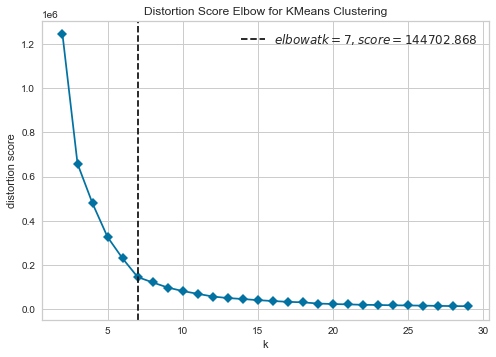

In [45]:
data = new_df[['latitude', 'longitude']]
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), timings = False)
visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show() 

The elbow method suggests that there are 7 clusters. Let us try another measure called "Silhouette"....

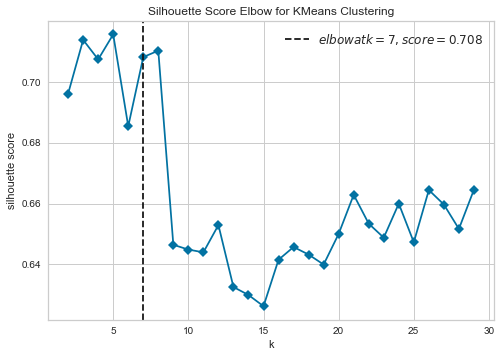

In [46]:
#let us try the silhouette method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), metric = 'silhouette',
                              timings = False)
visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show() 

The Silhouette method suggests 7 clusters. Good to know that the distortion method and the silhouette method concur.

In [47]:
#We will go with the Silhouette metric and select 6 components
km = KMeans(n_clusters=7, random_state=999)
km.fit(data) #computes k-means clustering
cluster_membership = list(km.predict(data)) #predicts closest cluster
new_df["KM_Cluster"] = cluster_membership
new_df.head()

,location,city,text,latitude,longitude,KM_Cluster
1,"Toronto, Ontario, Canada",Toronto,@lisaJtoronto @cityoftoronto @TorontoPolice 👉👉...,43.70011,-79.41630,1
2,"Halifax, Nova Scotia",Halifax,"If you wear your mask like this, trust me, you...",44.64533,-63.57239,1
4,"Lahore, Pakistan",Lahore,Article : Social Stigma and Racial Discriminat...,31.55800,74.35071,2
10,"Los Angeles, Free Republic of California",Los Angeles,interesting to see how many of these fools hav...,34.05223,-118.24368,6
11,"Birmingham, Alabama",Birmingham,@DrTsion @NickMD1980 @heart_armor @garthwalker...,52.48142,-1.89983,4


Notice that the two locations in Canada have been grouped together. Let us visualize our clusters on a map.....

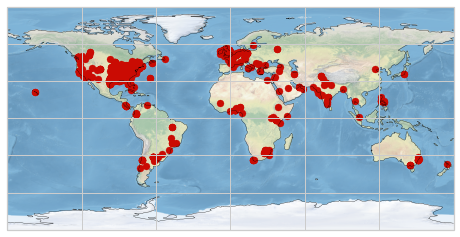

In [48]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.scatter(new_df['longitude'], new_df['latitude'], c = 'r')
ax.stock_img()

ax.coastlines()
ax.gridlines()



Let us try to use Basemap. You may install Basemap using the following command:

conda install -c anaconda basemap

See https://anaconda.org/anaconda/basemap for details.

In [49]:
from mpl_toolkits.basemap import Basemap
map_plotter = Basemap()

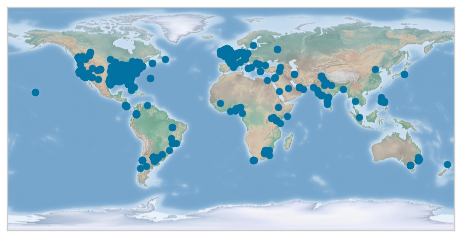

In [51]:
import matplotlib.pyplot as plt
latitudes = list(new_df['latitude'])
longitudes = list(new_df['longitude'])
map_plotter.scatter(longitudes, latitudes, latlon=True)
map_plotter.shadedrelief()
plt.show()

Let us group by the clusters we got through KMeans and see how they appear on the map.

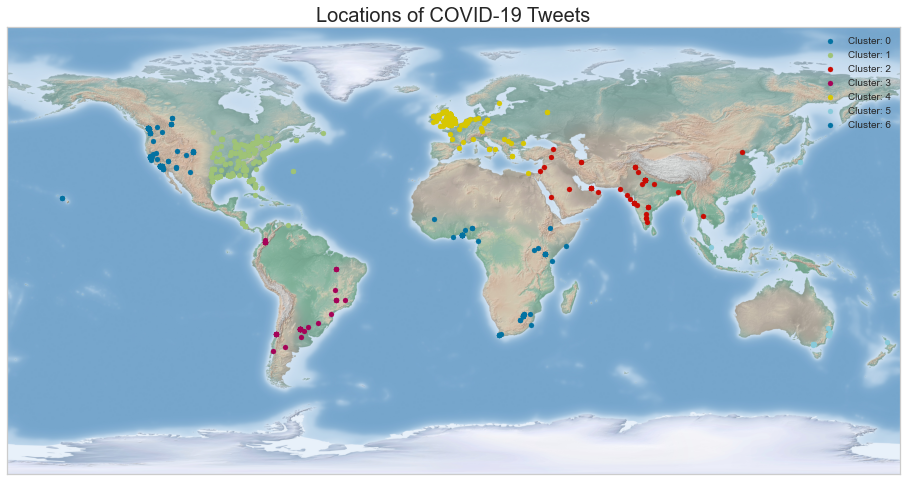

In [53]:
plt.figure(figsize=(16, 10))

map_plotter.shadedrelief()
# Convert the longitude, latitude to map projection coordinates
#x, y = map_plotter(x=df["longitude"], y=df["latitude"])

#map_plotter.shadedrelief()
#df["x"], df["y"] = x, y

# Iterate through each cluster and plot
for cluster, grouped in new_df.groupby("KM_Cluster"):
    plt.scatter(grouped["longitude"], grouped["latitude"], 25, marker="o", label=f"Cluster: {cluster}")

# Grab the figure to set the title and make a legend
ax = plt.gca()
ax.legend()
_ = ax.set_title("Locations of COVID-19 Tweets", size=20)

Looks like our clusters are quite reasonable. Here are a few ways to extend the analysis.

1. Do a sentiment analysis using the tweets. You may group them into positive and negative sentiments. Use mapping as shown above to visualize where the positive and negative tweets are coming from.

2. A more interesting thing would be to group by time and see how the map changes. For example, you could use 10-day windows to get location information and then come up with several maps showing how the density of tweets/messages by region has changed. Of course, you need to figure out how to get the timestamp of every tweet. That, however, shouldn't be hard.

One last analysis before we wrap up....

In [57]:
#let us try to get the top 5 cities associated with each
#cluster 
from collections import Counter
for i in range(7):
    sub_df = new_df[new_df['KM_Cluster'] == i]
    all_cities = list(sub_df['city'])
    city_counts = Counter(all_cities)
    top_five_cities = list(dict(city_counts.most_common(5)).keys())
    print("Top Cities for " + str(i) + ": " + str(top_five_cities) + "\n")
    print("*" * 30)

Top Cities for 0: ['Lagos', 'Johannesburg', 'Nairobi', 'Cape Town', 'Virginia']

******************************
Top Cities for 1: ['London', 'Toronto', 'Atlanta', 'Chicago', 'Portland']

******************************
Top Cities for 2: ['New Delhi', 'Mumbai', 'Dubai', 'Islamabad', 'Hyderabad']

******************************
Top Cities for 3: ['San Francisco', 'Florida', 'San Antonio', 'Sacramento', 'Carolina']

******************************
Top Cities for 4: ['York', 'Washington', 'Bristol', 'Boston', 'Dublin']

******************************
Top Cities for 5: ['Bay', 'Liverpool', 'Sydney', 'Tokyo', 'San Jose']

******************************
Top Cities for 6: ['Los Angeles', 'Vancouver', 'Ontario', 'Seattle', 'Oakland']

******************************


We hope you found this brief introduction to tweets useful. 